In [1]:
import sys 
sys.path.append("../..")

import numpy as np
import yellowbrick as yb 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(), k=(2, 12))

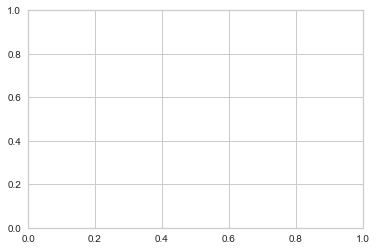

In [2]:
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer

In [3]:
from yellowbrick.utils.wrapper import Wrapper
from yellowbrick.base import Visualizer

In [4]:
class Outer(Visualizer, Wrapper):
    
    def __init__(self, estimator):
        self.estimator = estimator
        Wrapper.__init__(self, self.estimator)
        Visualizer.__init__(self, ax=None, fig=None)
    
    def get_params(self, deep=True):
        """
        After v0.24 - scikit-learn is able to determine that ``self.estimator`` is
        nested and fetches its params using ``estimator__param``. This functionality is
        pretty cool but it's a pretty big overhaul to change our "wrapped" estimator API
        to a "nested" estimator API, therefore we override ``get_params`` to flatten out
        the estimator params.
        """
        params = super(Outer, self).get_params(deep=deep)
        for param in list(params.keys()):
            if param.startswith("estimator__"):
                params[param[len("estimator__"):]] = params.pop(param)
        return params

In [5]:
class Subouter(Outer):
    
    def __init__(self, estimator, k=4):
        super(Subouter, self).__init__(estimator)
        self.k = k
        

In [6]:
o = Outer(KMeans())

In [7]:
print(o.estimator)
print(o.n_clusters)
# print(o.foo)

KMeans()
8


In [8]:
Subouter(KMeans())

Subouter(estimator=KMeans())

In [9]:
s = Subouter(KMeans(), k=9)

In [10]:
print(s.estimator)
print(s.n_clusters)
print(s.k)
# print(s.foo)

KMeans()
8
9


In [11]:
s.get_params()

{'estimator': KMeans(),
 'k': 9,
 'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [12]:
s

Subouter(estimator=KMeans(), k=9)

ModelVisualizer(ax=<AxesSubplot:>, estimator=KMeans(),
                fig=<Figure size 432x288 with 1 Axes>)

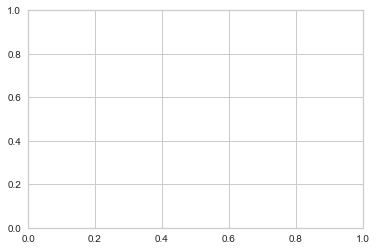

In [13]:
from yellowbrick.base import ModelVisualizer 

v = ModelVisualizer(KMeans())
v

In [14]:
from yellowbrick.model_selection import CVScores 
from sklearn.naive_bayes import GaussianNB

In [15]:
c = CVScores(GaussianNB())
print(c.color)

None


{'ax': <AxesSubplot:>,
 'color': None,
 'cv': None,
 'estimator': GaussianNB(),
 'scoring': None,
 'priors': None,
 'var_smoothing': 1e-09}

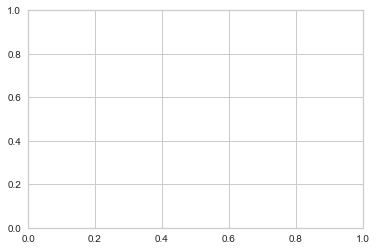

In [16]:
c.get_params()

In [17]:
c

CVScores(ax=<AxesSubplot:>, estimator=GaussianNB())